In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [27]:
data = pd.read_csv('../../data/kaikeba/beijing_houst_price.csv')
data.head()

,id,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,101084782030,2016-08-09,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,6,0.217,1.0,0.0,1.0,7,56021.0
1,101086012217,2016-07-28,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,6,0.667,1.0,1.0,0.0,7,71539.0
2,101086041636,2016-12-11,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,6,0.500,1.0,0.0,0.0,7,48160.0
3,101086406841,2016-09-30,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,6,0.273,1.0,0.0,0.0,6,51238.0
4,101086920653,2016-08-28,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,2,0.333,0.0,1.0,1.0,1,62588.0


In [28]:
data.describe()

,followers,totalPrice,price,square,kitchen,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [29]:
data[data['id'].duplicated()]

,id,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage


In [30]:
data['tradeTime'].value_counts()

2016-02-28    1096
2016-03-06     948
2016-07-31     940
2016-08-31     910
2016-03-05     824
              ... 
2002-06-01       1
2010-01-27       1
2010-08-09       1
2010-03-12       1
2010-11-14       1
Name: tradeTime, Length: 2560, dtype: int64

In [31]:
# 转换字符串位时间类型
data['tradeTime'] = pd.to_datetime(data['tradeTime'])

In [32]:
# 获取某一年的所有销量
data['tradeTime'].dt.year.value_counts()

2016    90829
2015    69805
2017    43217
2013    38751
2012    37221
2014    32602
2011     6010
2018      221
2010      189
2002        3
2009        1
2008        1
2003        1
Name: tradeTime, dtype: int64

In [33]:
# 选取统计的年份，删掉多余的年份
data.drop(data[data['tradeTime'].dt.year < 2012].index, inplace=True)


In [34]:
data.drop(data[data['tradeTime'].dt.year > 2017].index, inplace=True)

In [35]:
data['tradeTime'].dt.year.value_counts()

2016    90829
2015    69805
2017    43217
2013    38751
2012    37221
2014    32602
Name: tradeTime, dtype: int64

In [36]:
# 清理50万一下的书
data.drop(data[data['totalPrice'] < 50].index, inplace=True)

In [37]:
# (data['totalPrice'] < 50).any()
data[data['totalPrice'] < 50]

,id,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage


In [38]:
# 查看小区均价是否有null值
data[data['communityAverage'].isnull()]

,id,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
2027,101091727692,2016-12-05,106,1255.0,139290,90.10,4,0,0,0,底 1,NaN,3,0.250,0.0,1.0,1.0,10,NaN
3902,101091913830,2016-06-20,18,238.0,51830,45.92,1,1,1,1,高 6,4.0,4,0.071,0.0,0.0,1.0,7,NaN
4982,101092003852,2016-06-28,29,291.0,41195,70.64,1,1,1,1,高 11,4.0,6,0.333,1.0,0.0,1.0,7,NaN
5809,101092065365,2016-09-30,117,176.0,110000,16.00,1,0,0,0,底 1,NaN,3,0.250,0.0,0.0,1.0,1,NaN
6088,101092088297,2016-07-11,14,382.0,39024,97.89,2,2,1,1,中 28,1.0,6,0.300,1.0,1.0,1.0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316175,BJXC91739524,2016-03-12,0,155.0,115586,13.41,1,0,0,0,底 1,4.0,3,0.167,0.0,0.0,1.0,10,NaN
317054,BJXC92150717,2016-05-23,13,214.0,149442,14.32,1,0,0,0,底 1,2.0,3,1.000,0.0,0.0,0.0,10,NaN
317133,BJXC92215207,2016-05-22,3,227.0,145981,15.55,1,0,0,0,底 1,NaN,3,0.250,0.0,1.0,1.0,10,NaN
317186,BJXC92255534,2016-05-25,21,191.8,49987,38.36,1,1,1,1,底 1,NaN,3,0.125,0.0,1.0,1.0,10,NaN


In [39]:
# 处理null值
data.drop(data[data['communityAverage'].isnull()].index, inplace=True)

In [40]:
data[data['communityAverage'].isnull()]

,id,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage


In [41]:
data.describe()

,followers,totalPrice,price,square,kitchen,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,311265.000000,311265.000000,311265.000000,311265.000000,311265.000000,309378.000000,311265.000000,3.112650e+05,311256.000000,311256.000000,311256.000000,311265.000000,311265.000000
mean,17.069863,353.223028,44003.920852,83.259672,0.996103,3.008456,4.455936,6.469493e+01,0.578145,0.650314,0.601396,6.760593,63734.182439
std,34.392322,230.715694,21526.584077,37.149135,0.098505,1.270458,1.900800,2.537214e+04,0.493856,0.476872,0.489612,2.810020,22314.926838
min,0.000000,50.000000,2541.000000,7.370000,0.000000,0.125000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,1.000000,208.000000,28524.000000,57.920000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46392.000000
50%,5.000000,298.000000,39153.000000,74.240000,1.000000,4.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59023.000000
75%,19.000000,430.000000,54239.000000,98.640000,1.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75993.000000
max,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [42]:
# 以时间分组的平均价格
data_price = data.groupby('tradeTime').mean()["price"]

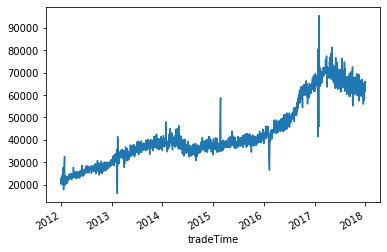

In [43]:
data_price.plot()

In [44]:
# 获取2017年的数据
data['year'] = data['tradeTime'].dt.year
data_17 = data[data['year'] == 2017]

In [45]:
data_17.describe()

,followers,totalPrice,price,square,kitchen,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,year
count,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,42666.000000,43144.000000,4.314400e+04,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,43144.0
mean,49.222464,528.044157,67157.150705,81.574348,0.997404,3.063751,4.435889,2.323801e+02,0.569372,0.562488,0.584971,6.656360,62059.157681,2017.0
std,62.484328,301.674952,24291.075264,37.767643,0.091056,1.244650,1.918408,4.818899e+04,0.495170,0.496086,0.492733,2.776666,21534.042920,0.0
min,0.000000,50.000000,6272.000000,15.360000,0.000000,1.000000,1.000000,1.400000e-02,0.000000,0.000000,0.000000,1.000000,14773.000000,2017.0
25%,11.000000,354.000000,49024.500000,57.430000,1.000000,3.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,45332.000000,2017.0
50%,31.000000,459.000000,62364.000000,72.630000,1.000000,4.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,57718.000000,2017.0
75%,64.000000,618.000000,80795.000000,95.400000,1.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,74566.000000,2017.0
max,1143.000000,18130.000000,150000.000000,1745.500000,3.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,158952.000000,2017.0


In [56]:
bins_arr = np.arange(50, 18150, 50)  # 设定分区
bins = pd.cut(data_17['totalPrice'], bins_arr)
# bin_count = data_17.groupby(bins).count()["totalPrice"]
bin_count = data_17["totalPrice"].groupby(bins).count()

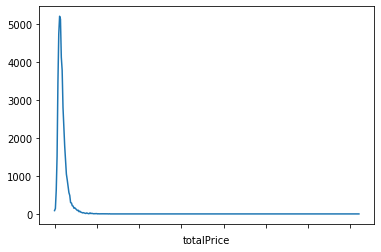

In [57]:
bin_count.plot()